In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Задача 1
Майло Тэтч исследует выборку независимых одинаково распределённых случайных величин $𝑋_1 , . . ., 𝑋_n$ из нормального 𝒩 (𝜇, 1) распределения.

**a)** Симулируйте такую выборку при 𝑛 = 100, 𝜇 = 5.

In [2]:
X = np.random.normal(loc = 5, scale = 1, size=100)

In [3]:
X

array([4.89675284, 5.13247695, 5.11325426, 6.10986014, 2.0565817 ,
       5.93680597, 5.3582763 , 3.65332727, 4.9069925 , 4.35713011,
       5.64962867, 5.96453628, 5.89832373, 5.47002948, 6.22552578,
       4.58611521, 4.46107019, 4.77663854, 5.28847678, 5.46521739,
       5.46451465, 4.7717175 , 5.31855715, 5.88350279, 5.92992624,
       4.84069234, 4.85149991, 5.07629473, 5.87641183, 3.30727551,
       3.28288175, 5.07844338, 4.18364182, 4.94186134, 5.40544066,
       6.35364921, 5.35979952, 4.55323424, 6.87029954, 3.39781051,
       4.44777585, 6.06330491, 6.63884723, 5.44950893, 5.38686803,
       3.39782199, 5.28032894, 4.9337417 , 5.74616524, 4.32881649,
       5.2101958 , 4.60986532, 2.94608114, 6.06192877, 4.12311334,
       4.93328483, 5.13786116, 3.81819622, 3.32164848, 6.21507869,
       5.30730199, 4.01940937, 4.97896503, 4.24520415, 5.33640383,
       5.68387537, 5.60206724, 3.60870086, 6.68195331, 4.78460335,
       5.58780735, 5.74160048, 3.69429241, 5.40019697, 5.26024

**b)** Научный опыт Майло говорит, что𝑓(𝜇)непременно равна 1. Найдите апостериорную плотность 𝑓(𝜇|𝑋) аналитически и постройте её график.

$$
f(\mu|X) = \frac{f(X|\mu)f(\mu)}{f(x)} \propto C \cdot \prod_i^n e^{\frac{(x_i - \mu)^2}{2}} =  C \cdot  e^{\frac{\sum_i^n(x_i - \mu)^2}{2}}
$$

 $$
 C \cdot \exp \left({\frac{\sum_i^n{x_i^2} - 2\mu\sum_i^n{x_i} + n\mu^2}{2}}\right) =  C \cdot \exp \left({\frac{\frac{\sum_i^n{x_i^2}}{n} - \frac{2\mu\sum_i^n{x_i}}{n} + \mu^2}{\frac{2}{n}}}\right)
 $$

$$
C \cdot \exp\left( \frac{\overline{X^2}  - 2\mu \overline X + \mu^2}{\frac{2}{n}}\right) = C \cdot \exp\left( \frac{\overline{X^2} +  \overline{X}^2- 2\mu \overline X + \mu^2 -  \overline{X}^2}{\frac{2}{n}}\right)
$$

$$
C \cdot \exp\left( \frac{(\overline{X} -  \mu)^2 + \overline{X^2} -  \overline{X}^2}{\frac{2}{n}}\right) = \tilde C \cdot \exp\left( \frac{(\overline{X} -  \mu)^2 }{\frac{2}{n}}\right)
\Rightarrow
$$ 

$$
\mu|X \sim \mathcal{N}\left(\overline X, \frac{1}{n}\right)
$$

In [60]:
def f_mu_x(mu, X): 
    return stats.norm(np.mean(X), 1/X.shape[0]).pdf(mu)

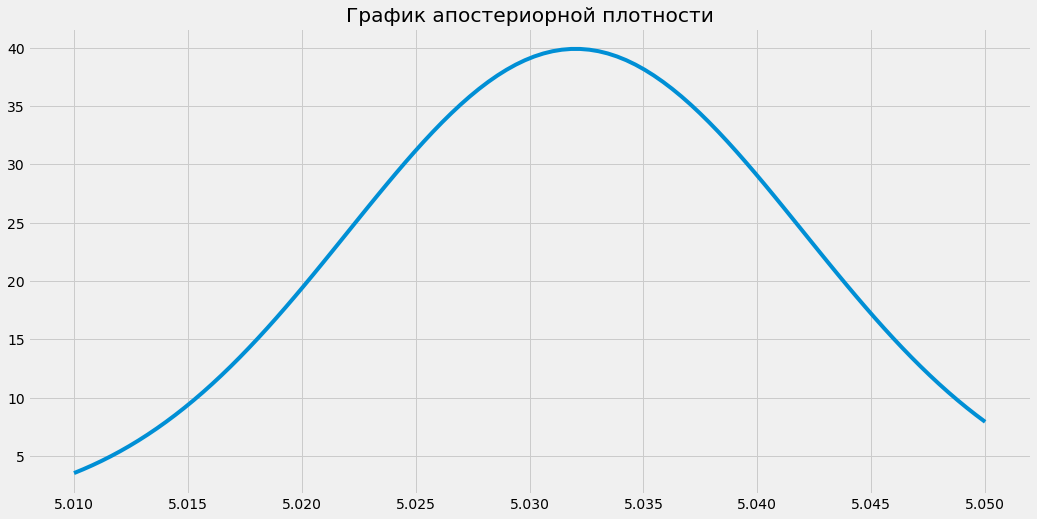

In [74]:
mus = np.linspace(5.01, 5.05, 100)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 8))
plt.title("График апостериорной плотности")
plt.plot(mus, f_mu_x(mus, X))
plt.show()

In [4]:
f_u_x = np.random.normal(np.mean(X), 1/100, 100)

c) Майло не хочет хранить апостериорную функцию плотности в явном виде и желает представить апостериорное распределение в виде массива чисел. Выберите любой способ сделать это и получите такой массив (размер массива – на ваш вкус). Постройте гистограмму полученного массива и визуально оце- ните, насколько хорошо она приближает аналитическую апостериорную плотность.

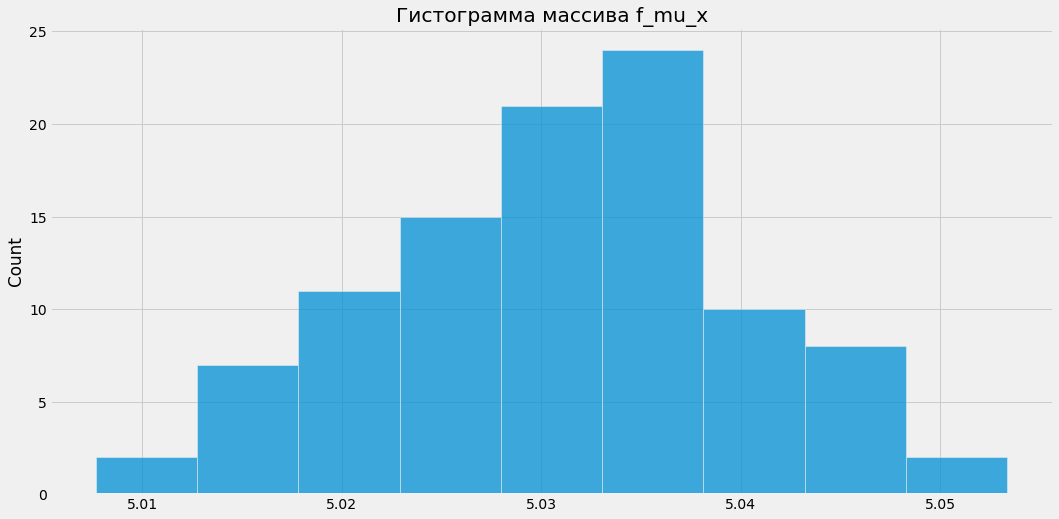

In [76]:
plt.figure(figsize=(16, 8))
plt.title("Гистограмма массива f_mu_x")
sns.histplot(f_u_x)
plt.show()

d) Майло считает, что недостаточно рассматривать только 𝜇: требуется изучить и 𝜃 = 𝑒 . Найдите апостериорную плотность 𝑓(𝜃|𝑋) аналитически и при помощи симуляций. Для симуляций используйте следующий алгоритм:

$$
\theta = g({\mu}) - F_{\theta}, f_{\theta}
$$


$$
F_{\theta}(g|X) = \mathbb{P}\{\theta \leq g | X\} = \int_{\theta \leq g} f(\mu|X)d\mu
$$

$$\theta = e^{\mu}$$

$$
F_{\theta}(g|X) = \mathbb{P}\{\theta \leq g | X\} = \mathbb{P}\{e^{\mu} \leq g | X\} =  \mathbb{P}\{\mu \leq \ln g | X\} = 
$$

$$
= \ \int_0^{\ln g} f(\mu|X)d\mu = \tilde C \int_0^{\ln g}  \exp\left( \frac{(\overline{X} -  \mu)^2 }{\frac{2}{n}}\right) d\mu
$$

Так как $f_\theta(g|X) = F'_{\theta}(g|X)$

$$
h'(g|X) = \tilde C \exp\left( \frac{(\overline{X} -  \ln(g)^2 }{\frac{2}{n}}\right) d(\ln(g)) =  \tilde C \exp\left( \frac{(\overline{X} -  \ln(g)^2 }{\frac{2}{n}}\right) \cdot \frac{1}{g}
$$

Ответ:
$$
f(\theta|X) =  \tilde C \exp\left( \frac{(\overline{X} -  \ln(\theta)^2 }{\frac{2}{n}}\right) \cdot \frac{1}{\theta}
$$

In [81]:
Q = np.random.normal(np.mean(X), 1/100, 100)
gamma = np.exp(Q)
gamma

array([151.74954282, 155.22481249, 151.69127053, 157.01707504,
       153.04009825, 153.24527439, 155.35622738, 153.27716015,
       154.61515339, 154.9918882 , 153.41842542, 153.2514082 ,
       156.58656974, 153.72322521, 153.35089784, 150.75930214,
       153.24566856, 151.88255407, 152.03541258, 153.03449804,
       154.64895134, 154.32757071, 153.19518636, 152.35614523,
       153.89915844, 153.27893362, 151.69388477, 154.94345255,
       152.89742956, 153.86533169, 156.98435624, 148.57130037,
       153.734017  , 154.24128087, 154.94288392, 151.75237366,
       152.92238416, 154.54526501, 150.5798013 , 152.64424919,
       152.8589124 , 152.42797517, 155.35662083, 150.69898436,
       151.85810945, 153.96862018, 152.44895632, 151.69124229,
       152.75617572, 151.41473776, 152.8909208 , 152.75329512,
       152.70141061, 155.01051656, 153.67148483, 158.08579569,
       152.22646277, 150.53680591, 152.97588577, 155.17260425,
       155.16495125, 150.96840665, 154.41744566, 153.67

**е)** Найти $\mathbb{P} \{ \mu \in (c, d) | X\} = 0.95$ - баейсовский доверительный интервал для $\mu$

$$
\mathbb{P} \{ \mu \in (c, d) | X\} = 0.95 \Leftrightarrow \begin{cases}
\mathbb{P} \{ \mu < c | X\} = 0.025, \\
\mathbb{P} \{ \mu > d | X\} = 0.025, 
\end{cases}
$$

$$
\mathbb{P} \{ \mu < c | X\} = 0.025 = \mathbb{P}\left( \frac{\mu - \overline \mu}{w} < \frac{c - \overline \mu}{w} | X\right)
$$

$$
[\overline \mu - 1.96w; \; \overline \mu + 1.96w]
$$

In [91]:
np.mean(f_u_x),  stats.sem(f_u_x)

(5.031038336189778, 0.0009082074370870587)

$$
[5.03 - 1.96 * 0.009; \;5.03   + 1.96*0.009]
$$

f) Постройте 95%-ый частотный доверительный интервал для 𝜇.

$$
[\overline X - 1.96s; \; \overline X + 1.96s]
$$

In [90]:
np.mean(X), stats.sem(X)

(5.03202167635336, 0.09171956223419797)

$$
[5.03 + 1.96*0.09; \; 5.03 + 1.96*0.09]
$$

# Задача 2. Необычная флора (5 баллов)

a) Сформулируйте гипотезы о наличии (отсутствии) эффекта действия каждого удобрения.Проверьте каждую гипотезу на уровне значимости 5%. Можно считать, что число наблюдений достаточно для применения асимптотических результатов. Для получения оценок используйте метод максимального правдоподобия.

$$
(H_0: p_i = p_{plac})\; i \in \{DAP, MAP, NPK, UAN\}
$$

$p_{plac}$ = доля улачшения в росте без удобрений. 


Много раз считали $p_{ML}$ - просто доля в нашем случае

$$
\hat p_{plac} = 0.42, \; \hat p_{DAP} = 0.37, \; \hat p_{MAP} = 0.17, \; \hat p_{NPK} = 0.74, \; \hat p_{UAN} = 0.44
$$

In [48]:
df = pd.DataFrame()
fertilizers = ['nothing', 'DAP', 'MAP', 'NPK', 'UAN']
nums = [42, 37, 17, 74, 44]
for i, fertilizer in enumerate(fertilizers):
    temp = np.zeros(100)
    samples = np.random.choice(100, size=nums[i], replace=False)
    temp[samples] = 1
    df[fertilizer] = temp

$$
2 \mathbb P\{ Z \leq z_{obs} | H_0\}
$$

ВОСПОЛЬЗУЕМСЯ ЧУДО ФУНКЦИЕЙ, ОНА СРАЗУ НАМ ВСЕ ПОСЧИТАЕТ))))))))))))
https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [154]:
p_values = []
test_statistics = []
import statsmodels as sm
for f in df:
    if f == 'nothing':
        continue
    test_statistic, p_value = sm.stats.weightstats.ztest(df['nothing'], df[f])
    p_values.append(p_value)
    test_statistics.append(test_statistic)
print("test_statistics", test_statistics)
print("p_values", p_values)

test_statistics [0.7205514984549954, 4.010481458436597, -4.821968078159475, -0.2842821248876059]
p_values [0.4711855039936055, 6.059505906658971e-05, 1.4214869794802558e-06, 0.7761941835604405]


С равниваем с 1.96 и получаем ответ

In [131]:
print((np.array(test_statistics) < 1.96))

[ True False  True  True]


True -  принимаем, False - отвергаем $H_{0}$ - гипотезу

**b)** Проведите процедуру множественного тестирования методом Бонферрони. Изменились ли результаты?

Бонферрони. Все очень просто просто сравниваем p_value c 0.05/4. Если p_value меньше чем 0.0125, то гипотеза $H_{0}$ отвергается

In [130]:
print(~(np.array(p_values) < 0.0125))

[ True False False  True]


True -  принимаем, False - отвергаем $H_{0}$ - гипотезу

**c)** Проведите процедуру множественного тестирования методом Бенджамини-Хохберга. Изменились ли результаты?

В общем,делаем все по алгоритму сортируем, создаем пороги, смотрим где p_value больше порога выбираем номер до него r, после выбираем (главный порог, с которым будем сравнивать) в качестве T = $p value_r$,  

In [155]:
p_values = np.array(p_values)

In [156]:
p_sorted = np.sort(p_values)
porogi = np.arange(1, 5) * 0.05 / 4

In [157]:
p_sorted < porogi

array([ True,  True, False, False])

In [158]:
T = p_sorted[1]
T

6.059505906658971e-05

Берем $T = p sorted[1]$

Если p_value $ \leq T$, то гипотеза $H_{0}$ отвергается

In [159]:
~(p_values <= T)

array([ True, False, False,  True])

Метод Бенджамини-Хохберга дал такие же результаты как метод Бонферрони

**d**) В общем все получилось максимально логично. MAP убивает растения, поэтому улучшения в росте всего лишь 17. NPK - отличное удобрение и улучшение в росте получлось 74. Остальные плюс минус тоже самое, поэтому мы их и приняли, а где есть различия мы отвергли, все получилось макимально четко, по кайфу одним словом.